**Análisis númerico 2024-1.**

---



**Grupo 1:**

*   Kevin Santiago Trivino Vanegas.
*   Alejandro Patiño Bedoya
*   Jhon Fredy Aguirre García.



In [ ]:
# Librerias necesarias:
import math # Para funciones matemáticas.
import numpy as np # Para trabajos con vectores.
import pandas as pd # Para realizar tablas.
from IPython.display import display # Imprimir tablas de manera llamativa.
import matplotlib.pyplot as plt # Para hacer gráficas.
from scipy.special import jv # Para graficar la funcion de Bessel J_0(t).
from sympy import * # Manejo de ecuaciones.

# Ejercicio 2.a.

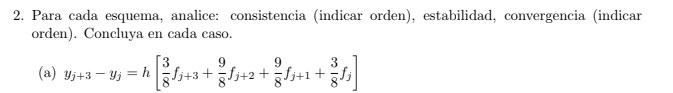

Obtenemos los polinomios caracteristicos asociados al esquema:

$$\psi(\mu)= \mu^3-1$$
$$\sigma(\mu)=\frac{3}{8}\mu^3+\frac{9}{8}\mu^2+\frac{9}{8}\mu+\frac{3}{8}$$

Empezamos con probar la consistencia, con el teorema de caracterizacíon condiciones para la consistencia de metodos multipaso lineales.

$$\psi_1(1)=1-1=0$$
$$\psi_2(\mu)=μ\psi_j'(μ)=3\mu^3$$
$$\psi_2(1)=3$$
$$\sigma_1(1)=\frac{3}{8}+\frac{9}{8}+\frac{9}{8}+\frac{3}{8}=\frac{24}{8}=3$$

Con esto tenemos que es consistente. Veamos que grado de consistencia tiene aplicando el  teorema importante 1.

In [ ]:
# Calculo de la derivada
def derivar(lista:list):
  L1=[]
  for i in range(1,len(lista)):
    L1.append(i*lista[i])
  return L1

# creamos un contador de grado de consistencia y las listas de los psi y los sigma

gradoConsistencia = 0
psi=[-1,0,0,1]
sigma=[3/8,9/8,9/8,3/8]
j=1

# se genera el ciclo con un contador que funcionará como el j
while sum([0]+derivar(psi))==j*sum(sigma): # probamos la condicion para el siguiente j
  # determinamos los nuevos valores
  j+=1
  psi=[0]+derivar(psi)
  sigma=[0]+derivar(sigma)
  # contamos el grado de consistencia
  gradoConsistencia += 1

print("el grado de consistencia del ejercicio es: ", gradoConsistencia)

el grado de consistencia del ejercicio es:  4


Probemos estabilidad con respecto a la condición de la raiz, recordando que
$$\psi_1(\mu)= \mu^3-1$$

Asi, buscamos las raices del anterior polinomio, por diferencia de cubos sabemos que:
$$\mu^3-1=(\mu-1)(\mu^2+\mu+1)=(\mu-1)(\mu-\frac{-1+\sqrt{3}i}{2})(\mu-\frac{-1-\sqrt{3}i}{2})$$

$\mu = 1 $ es claramente una raiz que cae dentro del circulo unitario. Veamos las otras dos raices.

$|\frac{-1+\sqrt{3}i}{2}|=(-0.5)^2+(\frac{\sqrt{3}}{2})^2=1$
$|\frac{-1-\sqrt{3}i}{2}|=(-0.5)^2+(\frac{-\sqrt{3}}{2})^2=1$

Con esto, se cumple el criterio de la raiz y por tanto es cero estable.

Veamos si es convergente. Por el teorema de Dahlquist, como sabemos que es consistente y cero estable, entonces es convergente. Veamos el orden de convergencia, por el teorema de la primera barrera de Dahlquist se sabe que el orden $p \leq 3+1=4$

# Ejercicio 3:

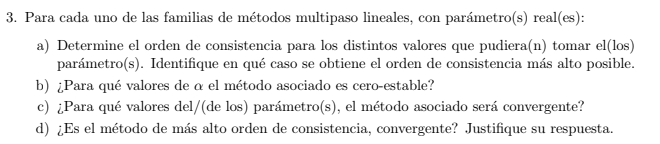



---


Consideremos un método multipaso lineal de la forma:

$\sum_{m=0}^r\alpha_m\mu^m=h\sum_{m=0}^r\beta_mf_{j+m}$.

Definimos:

$\psi(\mu)=\sum_{m=0}^r\alpha_m\mu^m$.

$\sigma(\mu)=\sum_{m=0}^r\beta_mf_{j+m}$.

Tenemos además que $\psi_{j+1}(\mu)=\mu\psi_j'$ y $\sigma_{j+1}(\mu)=\mu\sigma_j'$ donde $\psi_1(\mu)=\psi(\mu)$ y $\sigma_1(\mu)=\sigma(\mu)$.

Para verificar si el sistema es consistente de orden $k$ se debe cumplir dos condiciones:

1. $\psi_1(1)=0$.  

2.  Para $j\in\{1,...,k\}, \psi_{j+1}(1)=j\sigma_j(1)$.

Este procedimiento lo haremos usando la siguiente función, la cual arroja el mayor orden de consistencia de un MML dado:

In [ ]:
# Consistencia:
def OrdenConsNum(psi_1,sigma_1):
  # Guardaremos los valores en una lista:
  psiFuncs = [psi_1]
  sigmaFuncs = [sigma_1]
  orden=0

  while True:
    # Evaluamos la primera condición:
    if psiFuncs[0].subs(x,1) != 0:
      break

    # Evaluamos la segunda condición:
    # Sacamos las funciones anteriores:
    psi_j = psiFuncs[-1]
    sigma_j = sigmaFuncs[-1]

    # Se calcula el siguiente de psi_j:
    psi_j_1 = x*diff(psi_j,x)

    # Volvemos este resultado un número o lo metemos en variables para hacer la comparación:
    ladoIzq=psi_j_1.subs(x,1)
    ladoDer=(orden+1)*sigma_j.subs(x,1)

    try:
      float(psi_j_1.subs(x,1))
      float((orden+1)*sigma_j.subs(x,1))
    except: pass
    else:
      ladoIzq=round(psi_j_1.subs(x,1),2)
      ladoDer=round((orden+1)*sigma_j.subs(x,1),2)

    # Evaluamos si falla la condición de consistencia para el orden (orden+1):
    if ladoIzq != ladoDer:
      print(f"El sistema no es de orden {orden+1} ya que {ladoIzq} es diferente a {ladoDer}")
      break
    else:
      # Como cumple la condición de consistencia actualizamos la variable:
      orden = orden + 1

      # Calculamos el siguiente de sigma_j:
      sigma_j_1 = x*diff(sigma_j,x)
      sigmaFuncs.append(sigma_j_1)
      psiFuncs.append(psi_j_1)
  return orden

Para estudiar la cero estabilidad de los métodos multipasos, tenemos que el polinomio $\psi(\mu)$ debe satisfacer el criterio de la raíz, es decir, todas sus raíces caen dentro o sobre la circunferencia unitaria. Para esto usaremos la siguiente función:

In [ ]:
def cero_estable(psi,grado):
  raices=solve(psi,x) # Calculamos las reices del polinomio:
  # Generamos las inequaciones que nos permiten acotar las raices (solo se tiene en cuenta polinios de grado 2 y 3):
  if grado==2:
    inq1=abs(raices[0])<=1
    inq2=abs(raices[1])<=1
    # Solucionamos:
    solution = solve_univariate_inequality(inq1, a) and solve_univariate_inequality(inq2, a)
  else:
    inq1=abs(raices[0])<=1
    inq2=abs(raices[1])<=1
    inq3=abs(raices[2])<=1
    # Solucionamos:
    solution = solve_univariate_inequality(inq1, a) and solve_univariate_inequality(inq2, a) and solve_univariate_inequality(inq3, a)
  return solution

Recordemos ahora que para los MML, tenemos que:

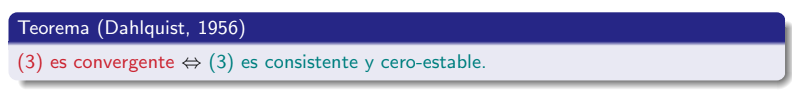

Por medio de este teorema estudiaremos la convergencia de los métodos.

---

## Númeral 3.1:
$y_{j+3}+\alpha(y_{j+2}-y_{j+1})-j_j=h(\beta f_{j+2}+f_{j+1})$, con $j\geq 0.$

**a) Consistencia:**

Para hallar el orden de consistencia y las valores de los parámetros reales, primero introducimos, utilizando los coeficientes que definen MML los llamados "Polinomios característicos" asociados a $(3,1)$ :

$$
\begin{aligned}
& \psi_{1}(\mu):=\mu^{3}+\alpha\left(\mu^{2}-\mu\right)-1 \\
& \sigma_{1}(\mu):=\beta\left(\mu^{2}+\mu\right)
\end{aligned}
$$

Ahora Introducimos la familia de polinomios:

$$
\psi_{j+i}(\mu):=\mu \psi_{j}^{\prime}(\mu), \quad \sigma_{j+1}(\mu):=\mu \sigma_{j}^{\prime}(\mu) \quad \forall j \in \mathbb{N}
$$

El método multi-paso lineal, tiene orden de consistencia al meros $k \in \mathbb{N}$, si:

(a) $\psi_{1}(1)=0$

(b) $\forall_{j} \in\{1, \ldots, k\}: \psi_{j+1}(1)=j \sigma_{j}(1)$

Se sigue en nuestro caso:

$$
\begin{aligned}
\psi_{1}(\mu) & =\mu^{3}+\alpha\left(\mu^{2}-\mu\right)-1 \\
\psi_{1}(1) & =1^{3}+\alpha\left(1^{2}-1\right)-1 \\
& =1-1+\alpha(0) \\
& =0 \text { se cumple }(a) .
\end{aligned}
$$

Luego:

$$
\begin{aligned}
\psi_{2}=\mu \psi_{1}^{\prime}(\mu) & =\mu\left(3 \mu^{2}+\alpha(2 \mu-1)\right) \\
& \left.=3 \mu^{3}+\alpha\left(2 \mu^{2}-\mu\right)\right) \\
\psi_{2}(1) & =3+\alpha(2-1) \\
& =3+\alpha
\end{aligned}
$$

$$
\begin{aligned}
\sigma_{1}(\mu) & =\beta\left(\mu^{2}+\mu\right) \\
\sigma_{1}(1) & =\beta(1+1) \\
& =\alpha \beta
\end{aligned}
$$

y ya que:

$$
\begin{aligned}
\psi_{2}(1) & =1 \sigma_{1}(1) \\
3+\alpha & =2 \beta \\
\alpha & =2 \beta-3
\end{aligned}
$$

Se concluye que en el caso (orden) $1$, $\alpha$ toma el valor de $2 \beta-3$, se sigue con el orden $2$ :

$$
\psi_{2+1}=\psi_{3}(\mu)=\mu \psi_{2}^{\prime}(\mu)
$$

$$
\begin{aligned}
\mu \psi_{2}^{\prime}(\mu) & =\mu\left(9 \mu^{2}+\alpha(4 \mu-1)\right. \\
& =9 \mu^{3}+\alpha\left(4 \mu^{2}-\mu\right) \\
\psi_{3} & =9+\alpha(3) \\
& =9+(2 \beta-3)(3) \quad(\alpha=2 \beta-3) \\
& =6 \beta \\
\sigma_{2}=\mu \sigma_{1}^{\prime}(\mu) & =\mu(\beta(2 \mu+1)) \\
& =\beta\left(2 \mu^{2}+\mu\right) \\
\sigma_{2}(1) & =\beta(3)
\end{aligned}
$$

Ahora bien:

$$
\begin{gathered}
\psi_{3}(1)=2 \sigma_{2}(1) \\
6 \beta=2(3 \beta) \\
\beta=\beta
\end{gathered}
$$

Se concluye de este proceso que se cumple la igualdad, se sigue con el orden $3$:

$$
\begin{aligned}
\psi_{4}=\mu \psi_{3}^{\prime}(\mu) & =\mu\left(27 \mu^{2}+a(8 \mu-1)\right) \\
& =27 \mu^{3}+\alpha\left(8 \mu^{2}-\mu\right) \\
\psi_{4}(1) & =27+(2 \beta-3)(7) \\
& =6+14 \beta \\
\sigma_{3}=\mu \sigma_{2}^{\prime}(\mu) & =\mu(\beta(4 \mu+1)) \\
& =\beta\left(4 \mu^{2}+\mu\right) \\
\sigma_{3}(1) & =5 \beta
\end{aligned}
$$

Luego:

$$
\begin{aligned}
& \psi_{4}(1)=3 \sigma_{3}(1) \\
& 6+14 \beta=15 \beta \\
& 6=\beta
\end{aligned}
$$

Se puede ver que $\beta$ toma el valor de 6 y ya

que $\alpha=2 \beta-3$ se remplaza llegando asi a que

$$
\alpha=9
$$

y con estos valores ya determinados se puede segir la secuencia (esta vez con un codigo) para hallar el orden de consistencia:

In [ ]:
x = symbols('x')

psi_1 = x**3 + 9 * x**2 - 9 * x - 1
sigma_1 = 6 * x**2 + 6 * x

print(f"Orden de consistencia: {OrdenConsNum(psi_1,sigma_1)}")

El sistema no es de orden 5 ya que 522 es diferente a 510
Orden de consistencia: 4


Siendo 4 el orden de consistencia mas alto posible tomando: $$\alpha = 9$$ $$\beta = 6$$

**b) Cero estabilidad:**

Sea $q$ un polinomio. Se dice que $q$ satisface el criterio de la raíz si todas sus raíces caen dentro o sobre el círculo unitario, siendo aquellas que caen en la circunferencia unitaria, raíces simples. Es decir:

a) $\forall \mu \in \mathbb{C}: q(\mu)=0 \Rightarrow|\mu| \leq 1$,

b) $\forall \mu \in \mathbb{C}: q(\mu)=0:\left(|\mu|=1 \Rightarrow q^{\prime}(\mu) \neq 0\right)$.

Cero estabilidad

El método multipaso se dice que es cero-estable si su primer polinomio característico, $\psi_1$, satisface la condición de la raíz.

\begin{aligned}
\psi_{1}(\mu) & =\mu^{3}+\alpha\left(\mu^{2}-\mu\right)-1 \\
\end{aligned}


In [ ]:
a=symbols("a")
q= (x**3) + a * (x**2 - x) - 1
raices = solve(q,x) # Se hallan las raices del polinomio caracteristico q
for i in range(len(raices)):
  inq1=abs(raices[i])<=1 # Para cada raiz se resuelve "a" de forma que el valor este pertenesca al intervalo [-1,1]
  solution1 = solve_univariate_inequality(inq1, a)
  print((raices[i], solution1))

(1, (-oo < a) & (a < oo))
(-a/2 - sqrt(a**2 + 2*a - 3)/2 - 1/2, (-oo < a) & (a <= 1))
(-a/2 + sqrt(a**2 + 2*a - 3)/2 - 1/2, (-3 <= a) & (a < oo))


El mètodo asociado es cero-estable cuando:  $$\alpha \in [-3, 1]$$

**c) Convergencia:**

El esquema multipaso lineal será consistente si y sólo si
$$
\psi_1(1)=0 \wedge \psi_2(1)=\sigma_1(1)
$$

Es convergente $\Leftrightarrow$ Es consistente y cero-estable.

Se sabe que:
$$\alpha  =2 \beta-3$$

los valores en los que es cero-estable y consistencia son:
$$\alpha \in [-3, 1] \wedge \beta \in [0, 2]$$

**d)** No será convergente cuando es consistente de mayor orden (es decir, 4) ya que para que sea consistente de orden 4 es necesario que $\alpha=9$, y $9\notin[-3,1]$, así que no será cero-estable.

## Númeral 3.4:
$y_{j+2}-2\alpha y_{j+1}+ (2\alpha-1)j_j=h[\alpha f_{j+2}+ (2-3\alpha)f_{j+1}]$, con $j\geq 0.$



--------



Definimos las funciones:

$\psi(\mu)=\mu^2-2\alpha\mu+2\alpha-1$.

$\sigma(\mu)=\alpha\mu^2+(2-3\alpha)\mu$.

In [ ]:
x = symbols('x')
a = symbols('a')
# Definimos las funciones:
psi_1 = (x**2)-(2*a*x) + (2*a) -1
sigma_1 = (a*(x**2))+(2*x)-(3*a*x)

**a) Consistencia:**

In [ ]:
print(f"Orden de consistencia: {OrdenConsNum(psi_1,sigma_1)}")

El sistema no es de orden 3 ya que 8 - 2*a es diferente a 3*a + 6
Orden de consistencia: 2


Como se logra ver, considerando $\alpha\in\mathbb{R}$ arbitrario, tenemos que el sistema tiene consistencia 2 ya que en general $8-2\alpha$ no es igual a $3\alpha+6,$ realizando el despeje del valor que necesita tomar $\alpha$ tenemos:

$8-2\alpha=3\alpha+6 \Longrightarrow 8-6=3\alpha+2\alpha \Longrightarrow \alpha=\frac{2}{5}$.

In [ ]:
#Si a=2/5:
psi_con_valor_a = (x**2)-(2*(2/5)*x) + (2*(2/5)) -1
sigma_con_valor_a = ((2/5)*(x**2))+(2*x)-(3*(2/5)*x)
print(f"Orden de consistencia: {OrdenConsNum(psi_con_valor_a,sigma_con_valor_a)}")

El sistema no es de orden 4 ya que 15.20 es diferente a 16.0000000000000
Orden de consistencia: 3


En conclusión, el sistema tiene orden de consistencia 2 con $\alpha\in\mathbb{R}$ y orden de consistencia 3 con $\alpha=\frac{2}{5}$.

**b) Cero estabilidad:**

In [ ]:
print(f"Para que el sistema sea cero estable, los intervalos de a son: {cero_estable(psi_1,2)}")

Para que el sistema sea cero estable, los intervalos de a son: (0 <= a) & (a <= 1)


Así, la cero estabilidad se tiene cuando $\alpha\in[0,1]$.

**c) Convergencia:**

El sistema es convergente donde sea cero estable y consistente, así:

*   El sistema es convergente de orden 2 donde $\alpha\in[0,1]$.
*   El sistema es convergente de orden 2 donde $\alpha=\frac{2}{5}$.

**d)** En conclusión, se tiene que en el mayor orden de consistencia (que es 3), el sistema si es convergente, ya que en dicho punto es cero estable.



# Ejercicio 4:

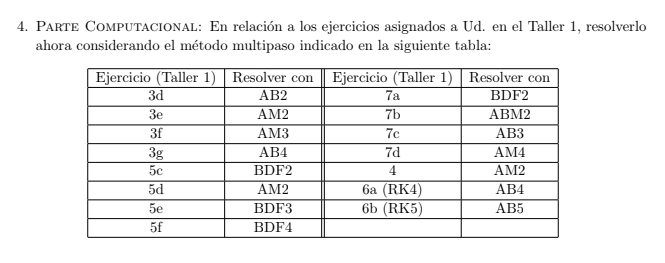

## Numeral 3.f con AM3:

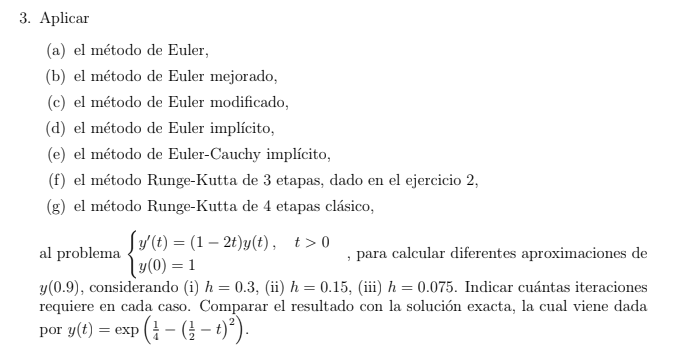
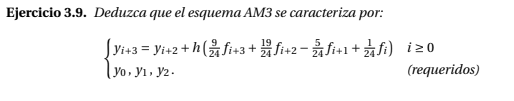

Tenemos que, $f(t,y_t)=y_t'=(1-2t)y_t$.

El método de Adams-Moulton es un método implícito y requiere algunos valores iniciales para comenzar, usaremos el método de Runge-Kutta de tres pasos para los primeros dos pasos.

Aplicaremos el método sobre el intervalo $[0,0.9]$ con diferentes valores de h, veamos la implementación de este:

Para h = 0.3, y(0.9) = 1.0772313175, error = 0.028585116378714748
Para h = 0.15, y(0.9) = 0.9338135785721711, error = 0.11483262254911408
Para h = 0.075, y(0.9) = 1.089716017868786, error = 0.041069816747500765


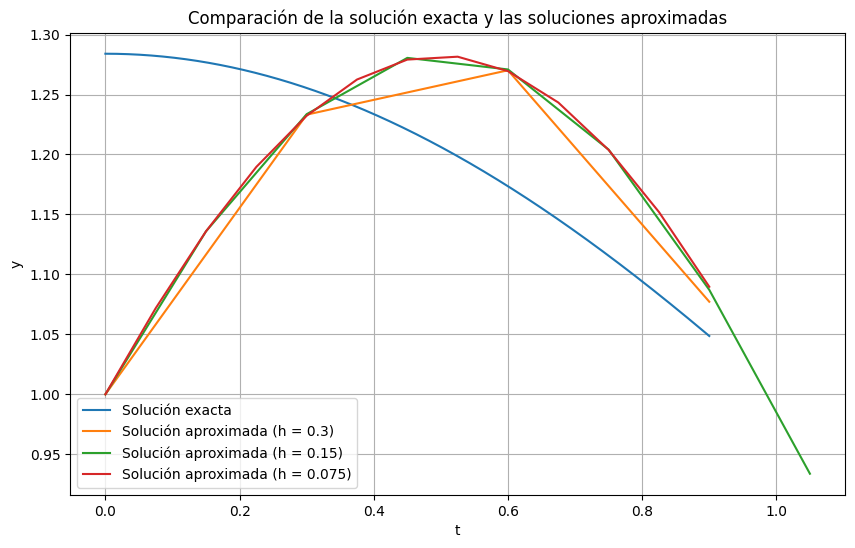

In [ ]:
# Usaremos las funciones:
def f(t, y):
    return (1 - 2*t)*y

def solucion_exacta(t):
    return np.exp(1/4 - ((1/2) * t)**2)

# Parámetros
t0, y0 = 0, 1  # Condición inicial
t_final = 0.9  # Tiempo final
h_valores = [0.3, 0.15, 0.075]  # Valores de h

# Crear una figura para la gráfica
plt.figure(figsize=(10, 6))

# Calcular y graficar la solución exacta
t_exact = np.linspace(t0, t_final, 1000)
y_exact = solucion_exacta(t_exact)
plt.plot(t_exact, y_exact, label='Solución exacta')

for h in h_valores:
    # Inicialización
    t = np.arange(t0, t_final+h, h)
    y = np.zeros_like(t)
    y[0] = y0

    # El método de Adams-Moulton es un método implícito y requiere algunos valores iniciales para comenzar:
    # Método de Runge-Kutta de tres pasos para los primeros dos pasos
    for i in range(2):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 2*h/3, y[i] + (2*h/3) * k1)
        k3 = f(t[i] + 2*h/3, y[i] + (2*h/3) * k2)
        y[i+1] = y[i] + h/8 * (2*k1 + 3*k2 + 3*k3)

    # Método de Adams-Moulton de tercer orden
    for i in range(2, len(t)-1):
        y[i+1] = y[i] + h/24 * (9*f(t[i+1], y[i]) + 19*f(t[i], y[i]) - 5*f(t[i-1], y[i-1]) + f(t[i-2], y[i-2]))

    # Graficar la solución aproximada
    print(f"Para h = {h}, y(0.9) = {y[-1]}, error = {abs(y[-1] - solucion_exacta(t_final))}")
    plt.plot(t, y, label=f'Solución aproximada (h = {h})')

# Configurar la gráfica
plt.title('Comparación de la solución exacta y las soluciones aproximadas')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Numeral 5.c con BDF2:

Se desea aproximar la solucion del PVI: $$f(t,y(t))=y'(t) = −y(t) + t^2 + 1$$$$ y(0) = 1$$$$ t ∈ [0, 1]$$

aplicando BDF2, considerando una partici ́on uniforme de [0, 1] con N subintervalos, donde N ∈ {10, 20, 40, 80, 160, 320, 640, 1280, 2560}. Diseñe una tabla que contenga el tamaño de paso h, el error asociado y el orden de convergencia experimental respectivo
(rh = log2(eh/eh/2)). Grafique las aproximaciones obtenidas junto con la solucion exacta. Comente sus resultados.
Solucion exacta: $$y(t) = −2e^{−t} + t^2 − 2t + 3$$

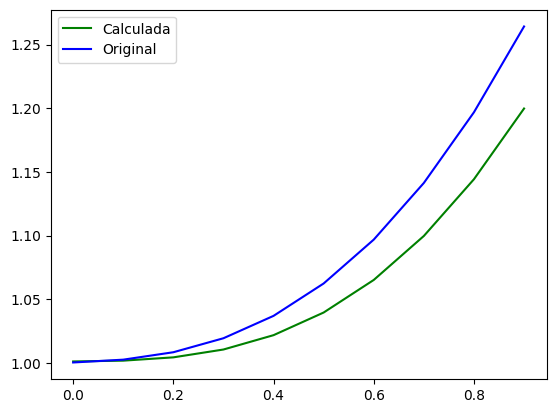

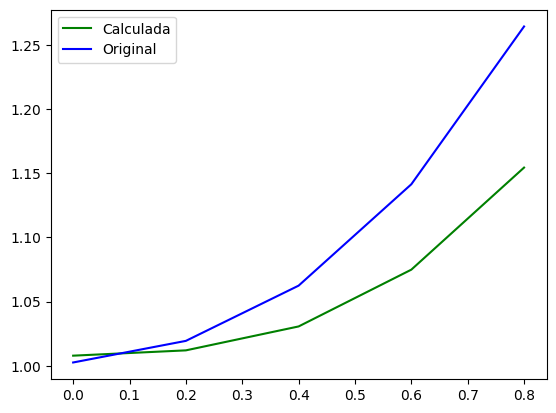


Calculo con 10 particiones:


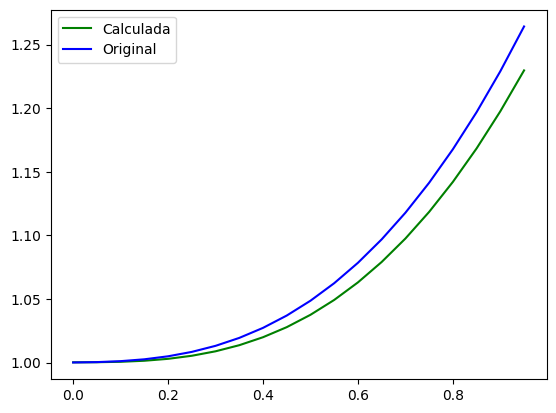

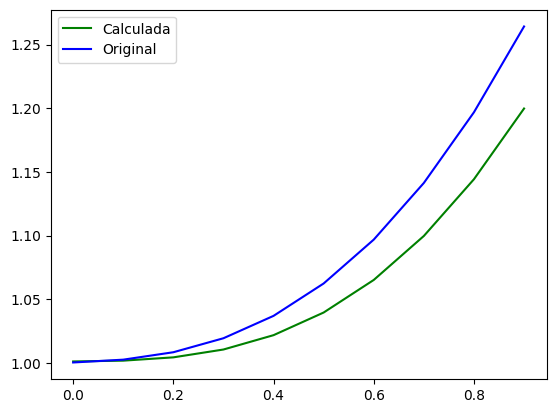


Calculo con 20 particiones:


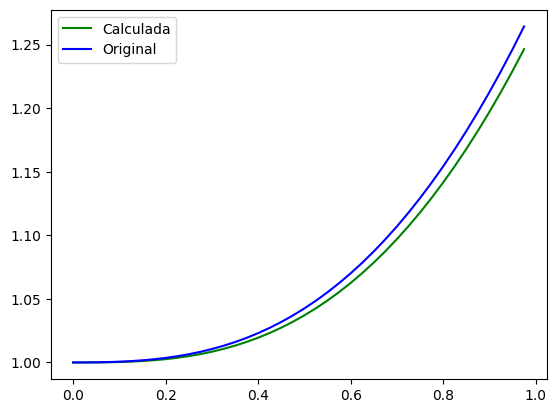

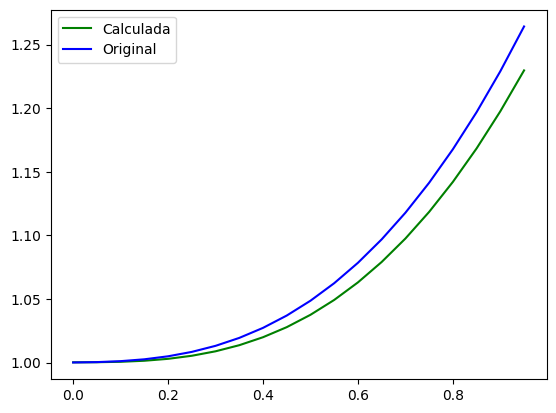


Calculo con 40 particiones:


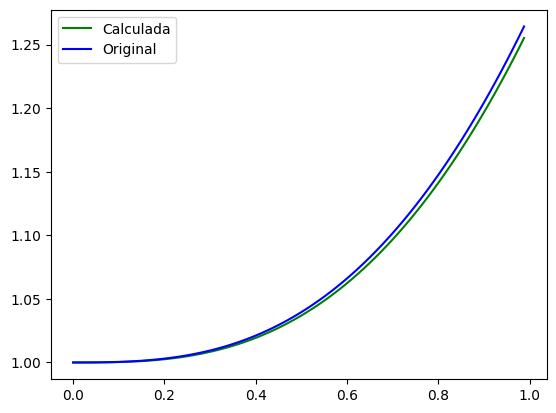

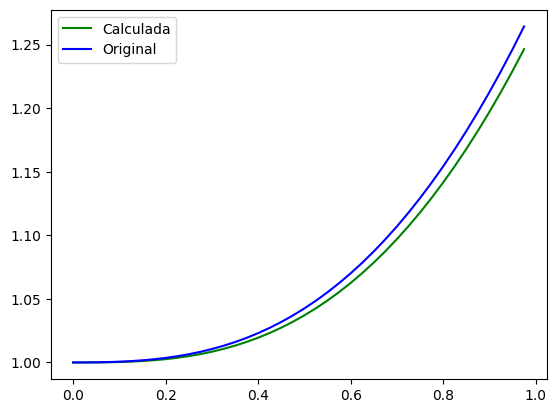


Calculo con 80 particiones:


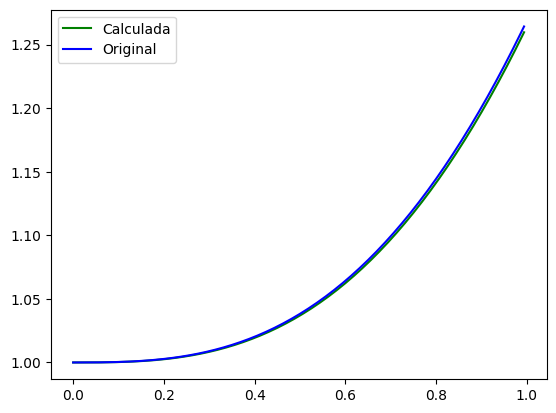

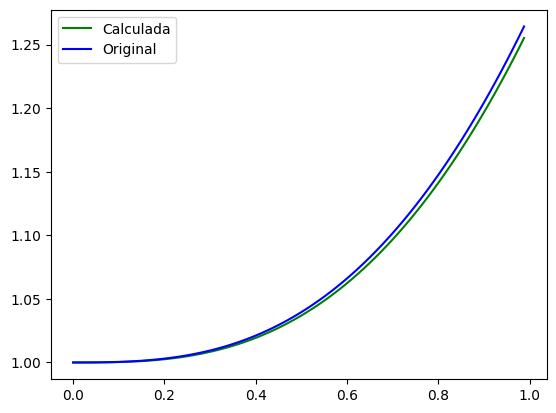


Calculo con 160 particiones:


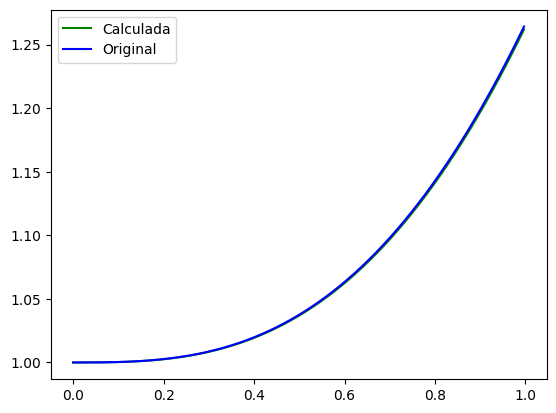

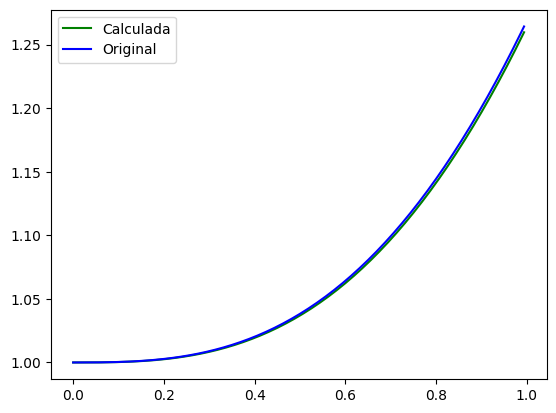


Calculo con 320 particiones:


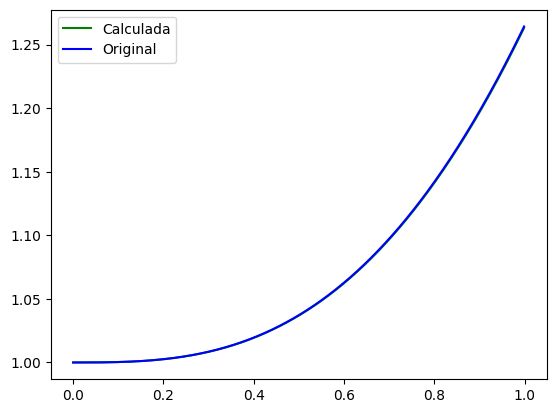

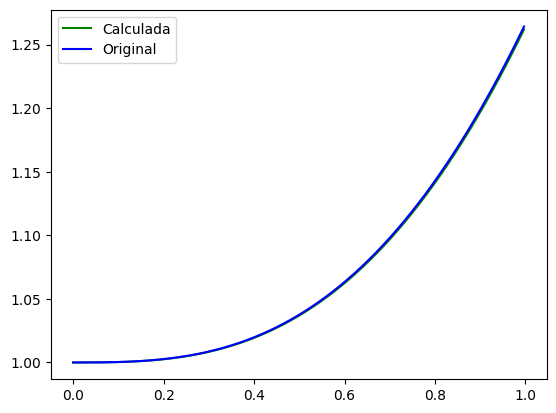


Calculo con 640 particiones:


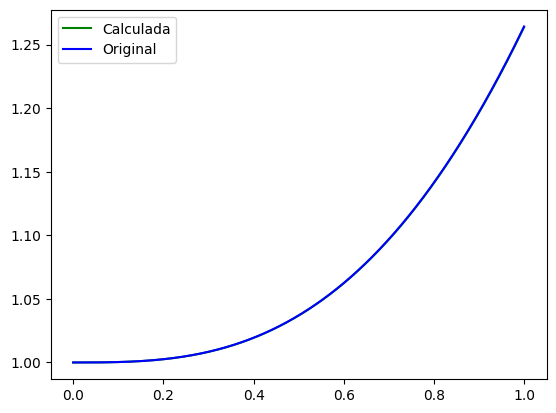

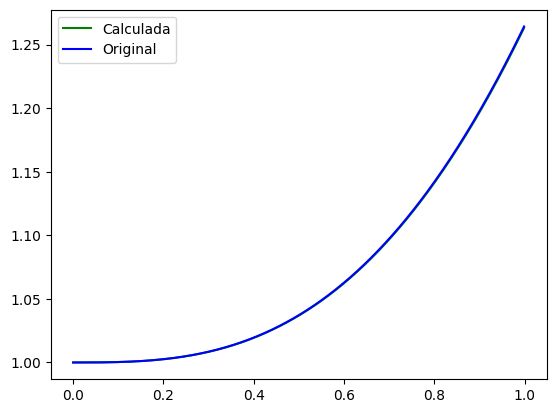


Calculo con 1280 particiones:


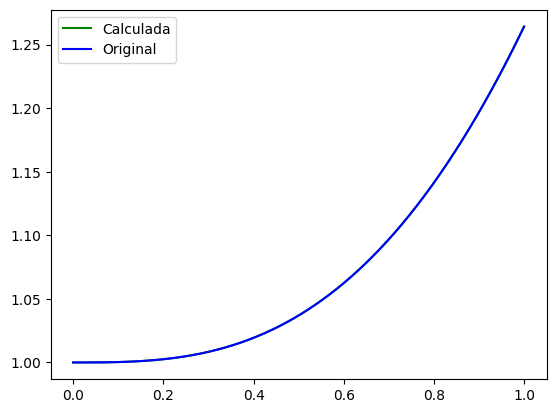

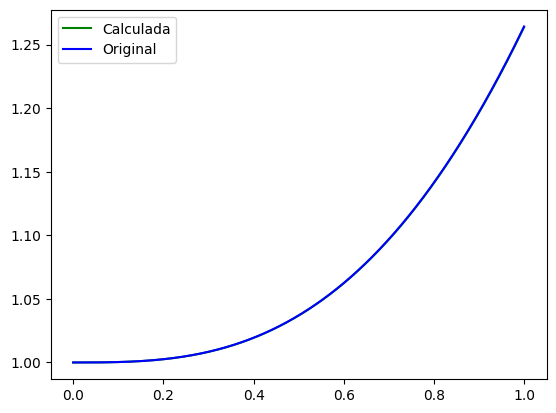


Calculo con 2560 particiones:
Tabla de los resultados para cada valor de h:


,h,Error,Orden de convergencia
0,0.100000,0.064444,-0.770168
1,0.050000,0.034545,-0.899574
2,0.025000,0.017839,-0.953432
3,0.012500,0.009059,-0.977613
4,0.006250,0.004564,-0.989028
5,0.003125,0.002291,-0.994569
6,0.001563,0.001147,-0.997298
7,0.000781,0.000574,-0.998653
8,0.000391,0.000287,-0.999327


In [ ]:
# Número de particiones
N=10

# Se define la función que calcula una aproximación por el método implícito de Euler para un valor N dado.
def BDF2(N):
    # Amplitud de la particion
    h=(1-0)/N

    # Se define f(t,y(t))=-y(t)+t**2+1
    # Se toma una lista de las aproximaciones, los valores en esos puntos de la solucion exacta y los errores asociados

    aproximaciones=[1]
    solucion = [1]
    errores = [0]

    # Listas para realizar las graficas de Func. Original Vs Func. Aproximada:
    Listt=[]
    y_calculado=[]
    y_original=[]

    # para implementar el metodo se aproxima y(t_1)con el metodo de euler implicito
    y_i=(aproximaciones[0]+h+h*(h)**2)/(1+h)
    aproximaciones.append(y_i)

    for j in range(N):

        t_j=0+j*h
        t_j_1=t_j+h
        # Se implementa la formula de recurrencia de la aproximacion y la agregamos a aproximaciones
        y_i=((4/3)*aproximaciones[-1]-aproximaciones[-2]/3+(2*h*t_j**2)/3+2*h/3)/(1+2*h/3)
        aproximaciones.append(y_i)

        # Se implementa la formula de recurrencia de la solucion exacta y la agregamos a solucion
        y_real = -2*np.e**(-t_j_1)+(t_j_1**2)-(2*t_j_1)+3
        solucion.append(y_real)

        Listt.append(t_j)
        y_calculado.append(y_i)
        y_original.append(y_real)

        # Se calcula el error y se agrega a errores
        e=abs(y_real-y_i)
        errores.append(e)
    plt.plot(Listt,y_calculado,"g")
    plt.plot(Listt,y_original,"b")
    plt.legend(["Calculada","Original"])
    plt.show()
    return h, max(errores)

# Se crea un arreglo de particiones
particiones=[10,20,40,80,160,320,640,1280,2560]

# Se crea un vector para crear la tabla
v=[]

# Se crea un ciclo para todas las particiones y los resultados se guardan en el vector que crea la tabla
for n in particiones:
    h, error=BDF2(n)
    h2, error_h2= BDF2(n//2)
    v.append([h,error,math.log2(error/error_h2)])
    print(f"\nCalculo con {n} particiones:")

tabla=pd.DataFrame(v)
tabla.columns = ["h","Error","Orden de convergencia"]
print("Tabla de los resultados para cada valor de h:")
display(tabla)

## Numeral 7.b con ABM2:

Para solucionar la ecuación $tu''(t)+tu'(t)+t^2u(t)=0$ con $t>0$ realizamos el siguiente reemplazo:

Sea:

$u_1(t)=u(t)$.

$u_2(t)=u'(t)$


Así, podemos definir las siguientes funciones:

$f_1(t,u_1)=u_1'=u_2$.

$f_2(t,u_2(t))=u'_2(t)=u''(t)=\frac{-u'(t)-tu(t)}{t}=\frac{-u_2(t)-tu_1(t)}{t}$.

Recordemos que:

$u_{1,j}=u_1(t_j)$.

$u_{2,j}=u_2(t_j)$.

$f_{1,j}=f_1(t_j,u_{1,j})$.

$f_{2,j}=f_2(t_j,u_{2,j})$.




In [ ]:
# Definimos las funciones f_1(t,u1)=u2 y f_2(t,u2)=f(t,u1'(u1)).
def f_1(t_j,u1_j,u2_j):
  return u2_j

def f_2(t_j,u1_j,u2_j):
  return -u2_j/t_j-u1_j

Usando el método de Adams-Bashforth Mejorado 2 (ABM2) tenemos las siguientes ecuaciones (escritas en el orden en que se deberán calcular):

$u_{2,j+2}^{pred}=u_{2,j+1}+h(\frac{3}{2}f_{2,j+1}-\frac{1}{2}f_{2,j})$.

$u_{1,j+2}^{pred}=u_{1,j+1}+h(\frac{3}{2}f_{1,j+1}-\frac{1}{2}f_{1,j})$.

Con estos dos valores podemos calcular:

$f_{2,j+2}^{pred}=f_2(t_{j+2},u_{1,j+2}^{pred},u_{2,j+2}^{pred})$.

Así, usando la finalidad del método, calculamos el valor estimado de $u_{2,j+2}$:
$u_{2,j+2}=u_{2,j+1}+h(\frac{5}{12}f_{2,j+2}^{pred}+\frac{8}{12}f_{2,j+1}-\frac{1}{12}f_{2,j})$.

Y logramos calcular:

$f_{1,j+2}^{pred}=f_1(t_{j+2},u_{1,j+2}^{pred},u_{2,j+2})$.

Consiguiendo así estimar el valor de $u(t)=u_1(t)$, que era nuestro objetivo:

$u_{j+2}=u_{1,j+2}=u_{1,j+1}+h(\frac{5}{12}f_{1,j+2}^{pred}+\frac{8}{12}f_{1,j+1}-\frac{1}{12}f_{1,j})$.

Pero, nótese dos factores importantes:



*   Al ser un método de dos pasos y solo poseer un valor inicial, debemos utilizar algún método de un paso para estimar otro valor que nos permita continuar la aproximación. En este caso usaremos el método Euler-Cauchy implícito, el acul, después de despejar (taller 1) nos otorga las siguientes fórmulas:

  $u_{2,1}=\frac{[1-\frac{h^2}{4}-\frac{h}{2t_0}]u_{2,0}-hu_{1,0}}{1+\frac{h}{2t_{1}}+\frac{h^2}{4}}$.

  $u_{1,1}=u_{1,0}+\frac{h}{2}[u_{2,0}+u_{2,1}]$



*   Además, para hacer uso de $f_2(t,u_2(t))$, se debe tener que $t\neq 0$, y como $t_0=0$ nos vemos obligados a calcular otro valor:

  $u_{2,2}=\frac{[1-\frac{h^2}{4}-\frac{h}{2t_1}]u_{2,1}-hu_{1,1}}{1+\frac{h}{2t_{2}}+\frac{h^2}{4}}$.

  $u_{1,2}=u_{1,1}+\frac{h}{2}[u_{2,1}+u_{2,2}]$

Con estas consideraciones podemos seguir a la implementación:






In [ ]:
# Método de Adams-Bashforth Mejorado 2 (ABM2):
def ABM2(h):
  # Consideramos el intervalo y el número de particiones.
  a=0
  b=3
  N=int((b-a)/h)

  # Hacemos las particiones.
  t=np.linspace(0,3,N+1)
  u_real=jv(0,t)
  u1=[1]
  u2=[0]


  # Usando Euler-Cauchy implícito.
  # Calculamos u_1.
  u2_1 = ((1-((h**2)/4)-(h/2*t[0]))*u2[0]-(h*u1[0]))/(1+(h/2*t[1])+((h**2)/4))
  u2.append(u2_1)
  u1_1 = u1[0]+((h/2)*(u2[0]+u2[1]))
  u1.append(u1_1)

  # Calculamos u_2 (ya que el valor u_0 se evalua con t=0 y no es posible usarlo en ABM2).
  u2_2 = ((1-((h**2)/4)-(h/2*t[1]))*u2[1]-(h*u1[1]))/(1+(h/2*t[2])+((h**2)/4))
  u2.append(u2_2)
  u1_2 = u1[1]+((h/2)*(u2[1]+u2[2]))
  u1.append(u1_2)

  for j in range(1,N-1):
    # Calculamos las predicciones.
    u2_predd = u2[j+1] + h*(3/2 * f_2(t[j+1],u1[j+1],u2[j+1]) - 1/2 * f_2(t[j],u1[j],u2[j]))
    u1_predd = u1[j+1] + h * (3/2 * f_1(t[j+1],u1[j+1],u2[j+1]) - 1/2 * f_1(t[j],u1[j],u2[j]))

    # Calculamos u2=u'.
    u2_cal = u2[j+1] + h * (5/12 * f_2(t[j+2],u1_predd,u2_predd) + 8/12 * f_2(t[j+1],u1[j+1],u2[j+1]) - 1/12 * f_2(t[j],u1[j],u2[j]))
    u2.append(u2_cal)

    # Calculamos u1=u.
    u1_cal = u1[j+1] + h * (5/12 * f_1(t[j+2],u1_predd,u2[j+2]) + 8/12 * f_1(t[j+1],u1[j+1],u2[j+1]) - 1/12 * f_1(t[j],u1[j],u2[j]))
    u1.append(u1_cal)

  # Graficamos.
  plt.plot(t,u1,"b")
  plt.plot(np.array(t),u_real,"r--")
  plt.title(f"h={h}")
  plt.legend(("Aproximada.","Real."))
  plt.show()

  return t,u1

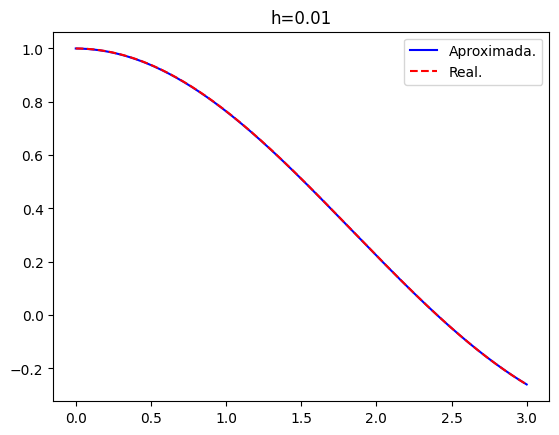

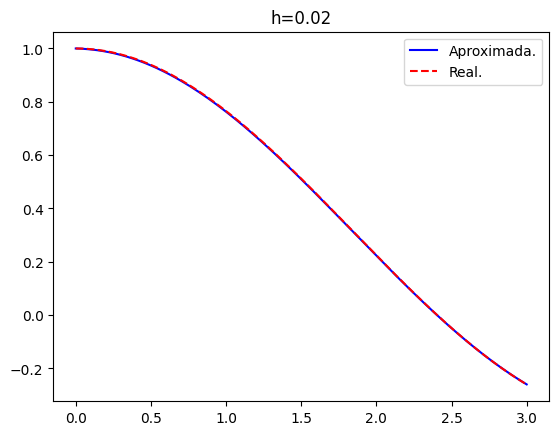

,h,J0(1),J0(3)
0,0.01,0.764497,0.762802
1,0.02,-0.259936,-0.259726


In [ ]:
# Creamos una tabla para ver los resultados.
df=pd.DataFrame()

# Si h=0.01:
h1=0.01
t1,u1 = ABM2(h1)

# Si h=0.02:
h2=0.02
t2,u2 = ABM2(h2)

# Actualizamos y mostramos los resultados.
df["h"]=[0.01,0.02]
df["J0(1)"]=[u1[100],u1[300]]
df["J0(3)"]=[u2[50],u2[150]]
display(df)